In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Exibir gráficos inline no notebook
%matplotlib inline

df_his_credito = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20sem_classe.csv')
df_his_credito

,Genero,GrauEscolaridade,Profissao,Renda
0,1,4,1,1.4
1,2,7,9,2.6
2,1,7,9,5.8
3,1,7,9,4.7
4,1,7,9,3.9
...,...,...,...,...
95,1,4,1,2.9
96,1,4,1,1.4
97,2,7,8,2.6
98,1,7,8,5.8


In [3]:
# Normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_his_credito)

# Conferir as primeiras linhas dos dados normalizados
print(pd.DataFrame(df_scaled, columns=df_his_credito.columns).head())


     Genero  GrauEscolaridade  Profissao     Renda
0 -0.717741         -0.006009  -1.166130 -0.842825
1  1.393261          1.796549   1.461769 -0.156257
2 -0.717741          1.796549   1.461769  1.674590
3 -0.717741          1.796549   1.461769  1.045236
4 -0.717741          1.796549   1.461769  0.587524


In [4]:
# Aplicar o K-means com k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df_his_credito['cluster'] = kmeans.fit_predict(df_scaled)

# Exibir os clusters gerados
print(df_his_credito.head())

# Exibir a inércia (soma das distâncias quadradas dos pontos para o centro do cluster)
print(f"Inércia: {kmeans.inertia_}")


   Genero  GrauEscolaridade  Profissao  Renda  cluster
0       1                 4          1    1.4        0
1       2                 7          9    2.6        0
2       1                 7          9    5.8        1
3       1                 7          9    4.7        1
4       1                 7          9    3.9        1
Inércia: 237.37269024304885


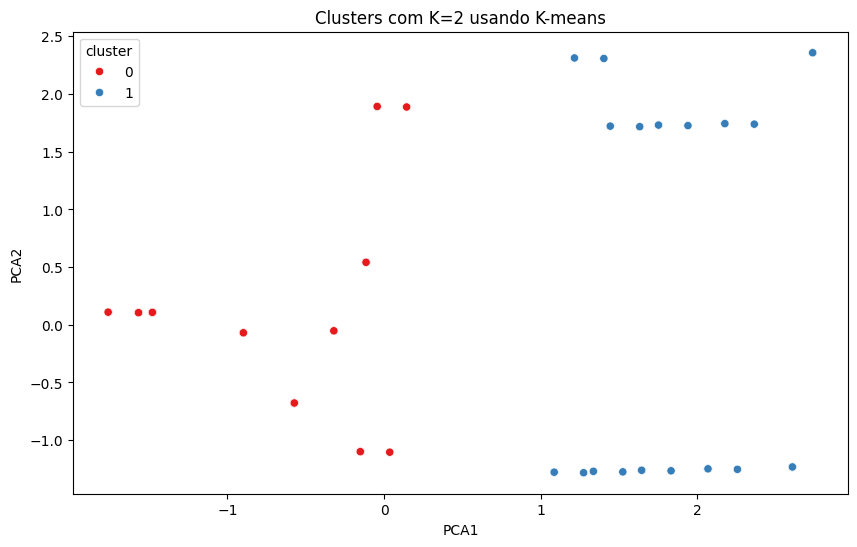

In [6]:
# Redução de dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Criar DataFrame com os componentes principais e os clusters
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df_his_credito['cluster']

# Scatterplot para visualização
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='Set1')
plt.title('Clusters com K=2 usando K-means')
plt.show()


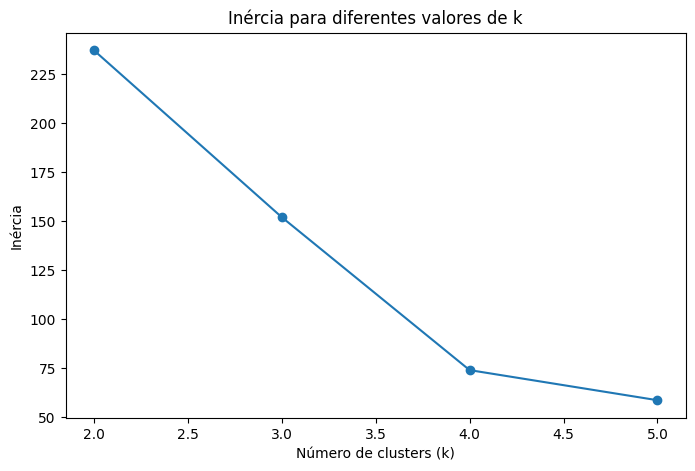

In [7]:
# Testar com diferentes valores de k
inertias = []
ks = range(2, 6)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico de inércia
plt.figure(figsize=(8,5))
plt.plot(ks, inertias, marker='o')
plt.title('Inércia para diferentes valores de k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.show()


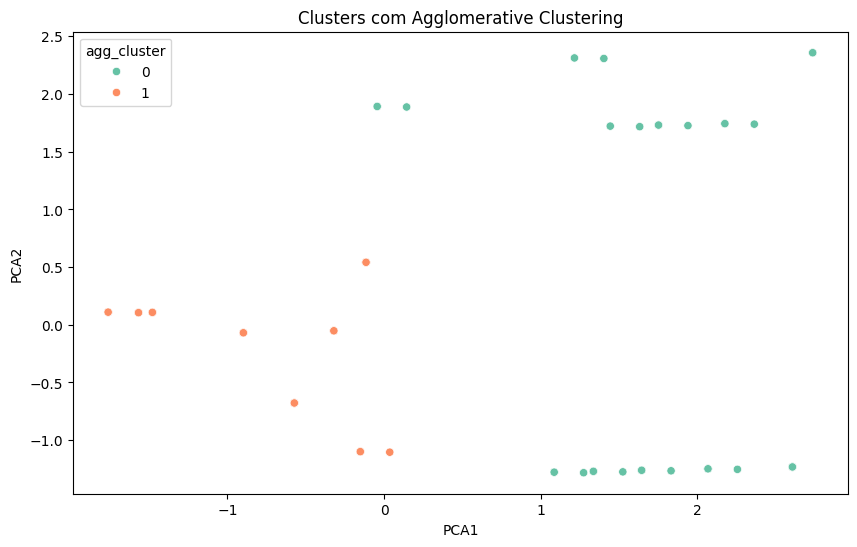

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2)
df_his_credito['agg_cluster'] = agg_cluster.fit_predict(df_scaled)

# Adicionar o resultado de 'agg_cluster' ao DataFrame PCA
df_pca['agg_cluster'] = df_his_credito['agg_cluster']

# Visualização para o Agglomerative Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='agg_cluster', data=df_pca, palette='Set2')
plt.title('Clusters com Agglomerative Clustering')
plt.show()


In [11]:
from sklearn.metrics import silhouette_score

# Avaliar a qualidade dos clusters
score = silhouette_score(df_scaled, df_his_credito['cluster'])
print(f"Coeficiente de Silhueta para k=2: {score}")


Coeficiente de Silhueta para k=2: 0.45717734522447173
